## Feature extraction 

In [1]:
from jl_song_data import SongData 
import pandas as pd

In [2]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [3]:
df = data.df

In [4]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

## Remove non valid chords 

This `eval` is to convert string column to array colum

In [5]:
df['chords'] = df['chords'].apply(eval)

In [6]:
from jl_chord_parser import ChordParser
parser = ChordParser()

Parse returns `None` if chord is not valid

In [7]:
df['chords'] = \
    df['chords'].apply(\
        lambda chords: [chord for chord in chords if parser.parse(chord) is not None] )\


##  Extract artist 

In [8]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [9]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist
865,https://tabs.ultimate-guitar.com/tab/ariana_gr...,Almost Is Never Enough,2010s,Contemporary R&b,"[D, G, Bm, A, D, G, D, G, D, G, Bm, A, D, G, B...",7b99cd2f-00e6-42cf-9116-af5d1719692a,Ariana Grande
3423,https://tabs.ultimate-guitar.com/tab/dream-the...,Hollow Years,1990s,Metal,"[Dm, Fmaj9, C, Gm, Gm, A, A9, Dm, A, Dm, Bbmaj...",02969704-72b6-4cc9-be3e-d509be0f7fc2,Dream Theater
4509,https://tabs.ultimate-guitar.com/tab/four-tops...,Baby I Need Your Loving,1960s,Rhythm And Blues,"[A, G, D, A, G, D, A, G, D, A, G, D, A, G, D, ...",01036e59-9c48-42bb-bfdb-9cc7a96eb8c2,Four Tops
10534,https://tabs.ultimate-guitar.com/tab/robert-ea...,Feelin Good Again,1990s,Country,"[G, Bm, Em, D, G, Bm, Em, D, G, Bm, Em, D, C, ...",4f79857c-63e5-4ec6-9038-03f69599f8d8,Robert Earl Keen
4128,https://tabs.ultimate-guitar.com/tab/eric-clap...,Im Tore Down,1990s,Blues,"[G7, F7, C7, C7, F7, C7, G7, F7, C7, C7, F7, C...",8a0ea60b-835e-452d-919f-38b445ded535,Eric Clapton
13439,https://tabs.ultimate-guitar.com/tab/ub40/sins...,Sins Of The Fathers,2000s,Reggae,"[G, C, D, G, G, C, D, G, G, C, D, G, C, D, C, ...",f3158e7b-9e33-4291-a168-479e10dbca0e,Ub40
702,https://tabs.ultimate-guitar.com/tab/amy_grant...,Better Than A Hallelujah (ver 5),2010s,Religious Music,"[G, Em, C, G, G, Em, C, G, G, Em, C, G, Em, C,...",18d72d3a-f689-4989-b537-0153f3279d48,Amy Grant
9865,https://tabs.ultimate-guitar.com/tab/petula-cl...,Downtown,1960s,Pop%%Pop,"[E, A/E, B/E, E, A/E, B/E, E, A/E, B/E, E, C#m...",e0adb405-5b17-4f1a-a993-f232894046c0,Petula Clark
8605,https://tabs.ultimate-guitar.com/tab/michael-j...,Black Or White (ver 2),1990s,Pop%%Contemporary R&b%%Pop,"[Esus4, E, Esus2, E, E, A, E, B, A, E, E, A, E...",ca11699a-fd55-401f-b6a3-181115781c36,Michael Jackson
6820,https://tabs.ultimate-guitar.com/tab/joss-ston...,Less Is More,2000s,Rhythm And Blues,"[Am, Em, B7, Am, Em, Am, Em, Am, Em, B7, Am, E...",a454c17a-dd40-449b-82f2-b57b40f762b5,Joss Stone


## Extract decade as numeric 

In [10]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [11]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [12]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Remove duplicate genres

In [13]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'] = df['genre'].apply(remove_duplicate_genre_inside_cell)

In [14]:
import jl_io as io

genres = io.from_file('../data/genres')

In [15]:
genre_names = [genre['name'] for genre in genres]
genre_names

['Rock',
 'Folk',
 'Pop',
 'Country',
 'Electronic',
 'Rhythm And Blues',
 'Metal',
 'Contemporary R&b',
 'Religious Music',
 'Hip Hop',
 'Reggae',
 'Jazz',
 'Blues',
 'World Music',
 'Disco',
 'Comedy',
 'New Age',
 'Classical',
 'Experimental',
 'Darkwave',
 'Soundtrack']

In [16]:
genre_df = pd.DataFrame(genre_names, columns=['genre'])

In [17]:
genre_df['count'] = genre_df['genre'].apply( \
    lambda genre: len(df[df['genre'].str.contains(genre)]))

genre_df.sort_values(by='count', ascending=False).plot.bar(x='genre', y=f'count')

## Harmonics features 

We are going to extract all the harmonic features, i.e. related to chords. 

### Cardinality (number of chords) 

In [18]:
df['cardinality'] = df['chords'].apply(feature_extractor.extract_cardinality)

In [19]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist,cardinality
8537,https://tabs.ultimate-guitar.com/tab/metallica...,Mama Said (ver 2),1990,Metal,"[Dm, Dsus4, C, Asus4, Am, Asus2, Bb, G, F, Dm,...",fcc9f9b4-0a5e-440c-abeb-4e2d26f65c30,Metallica,236
6676,https://tabs.ultimate-guitar.com/tab/johnny-ca...,The Wreck Of The Old 97,1950,Country,"[G, C, G, D7, G, C, G, D7, G, C, G, D7, G, C, ...",767648fb-4c64-4f9c-a8e1-977ab9ab5fdd,Johnny Cash,41
11783,https://tabs.ultimate-guitar.com/tab/taylor_sw...,Breathe (ver 4),2000,Country,"[C, G, F, C, G, F, C, G, F, C, G, F, C, G, F, ...",e1365006-f4e2-41dd-bb66-f2ddc58728c2,Taylor Swift,123
10608,https://tabs.ultimate-guitar.com/tab/ronan-kea...,If Tomorrow Never Comes,2000,Pop,"[G, Am, D, C, G, C, G, D, C, D, C, G, C, G, Am...",640aa275-29b5-40de-b6d3-e339f614ab77,Ronan Keating,100
9135,https://tabs.ultimate-guitar.com/tab/new-order...,World In Motion,1990,Electronic,"[Am, Em, D, Am, Em, D, Am, Em, D, Am, Em, D, A...",08f0344c-03a0-42f1-8c3b-c5c935a5532d,New Order,57
11516,https://tabs.ultimate-guitar.com/tab/sting/mad...,Mad About You,1990,Folk%%Pop,"[Am, Am/C, Fmaj7, Eaug, Am, Am/C, Fmaj7, Eaug,...",1ecc59e0-88ee-418d-9197-13a26dcf73e9,Sting,51
7626,https://tabs.ultimate-guitar.com/tab/linda-ron...,Someone To Watch Over Me,1980,Pop,"[G, Ddim7, Am7, D11, G7, Cmaj7, A7, Am7, D7(b9...",9ca8c174-8b14-40f7-b799-e31c8999c686,Linda Ronstadt,83
604,https://tabs.ultimate-guitar.com/tab/alicia_ke...,If I Aint Got You (ver 6),2000,Contemporary R&b%%Rhythm And Blues,"[G, Em7, Am7, D7, G, G#dim7, Am7, D7, Gmaj7, A...",c66a2e09-aa26-4355-9913-fdbe2efdaf53,Alicia Keys,52
3994,https://tabs.ultimate-guitar.com/tab/emmylou-h...,Two More Bottles Of Wine,1970,Country,"[D, G, D, D, A7, D, D7, G7, D, G7, A7, D7, D7,...",1234d8ac-1692-4cfa-ba40-1167446eb78b,Emmylou Harris,89
3822,https://tabs.ultimate-guitar.com/tab/elvis-pre...,I Got Stung,1950,Rock,"[D, D, D, G, D, A, G, D, D, D, G, D, A, G, D, ...",74b6cc97-d51f-40eb-ab4e-71142ca910d1,Elvis Presley,30


In [20]:
df['cardinality'].describe()

count    14114.000000
mean        85.521468
std         68.705570
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [21]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,Abba,0
...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Pop%%Rhythm And Blues,[],f0a72548-c85e-4848-bf60-af2e62993f5d,Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [22]:
df = df[df['cardinality'] != 0]

In [23]:
df['cardinality'].describe()

count    14043.000000
mean        85.953856
std         68.608710
min          1.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

The same occurs for songs with one or two chords (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [24]:
df = df[df['cardinality'] != 1]

In [25]:
df = df[df['cardinality'] != 2]

In [26]:
df['cardinality'].describe()

count    14031.000000
mean        86.026014
std         68.593639
min          3.000000
25%         51.000000
50%         78.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [27]:
df['cardinality'].mode()

0    68
1    72
dtype: int64

Total number of chords

In [28]:
df['cardinality'].sum()

1207031

In [29]:
import matplotlib.pyplot as plt

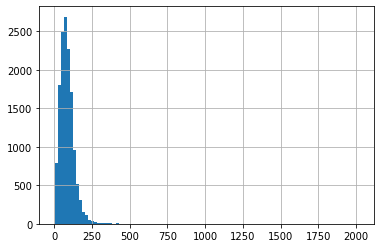

In [30]:
df['cardinality'].hist(bins=100)

#### By genre 

In [31]:
def plot_mean_by_genre(column_name):
    genre_df[f'avg {column_name}'] = genre_df['genre'].apply( \
        lambda genre: df[df['genre'].str.contains(genre)][column_name].mean())
    
    genre_df.sort_values(by=f'avg {column_name}', ascending=False).plot.bar(x='genre', y=f'avg {column_name}')
    

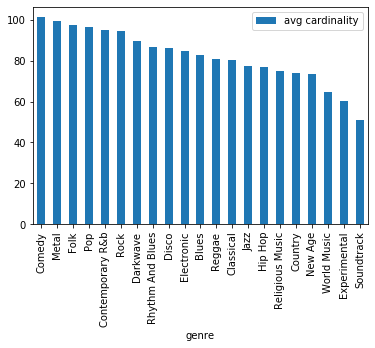

In [32]:
plot_mean_by_genre('cardinality')

#### By decade 

In [33]:
def plot_mean_by_decade(feature):
    df.groupby('decade')[feature].mean().plot.bar()

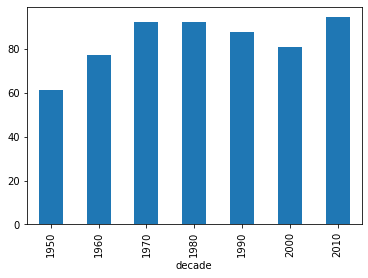

In [34]:
plot_mean_by_decade('cardinality')

### Unique cardinality (number of different chords) 

In [35]:
df['unique cardinality'] = df['chords'].apply(feature_extractor.extract_unique_cardinality)

In [36]:
df['unique cardinality'].describe()

count    14031.000000
mean         7.629606
std          5.418258
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        101.000000
Name: unique cardinality, dtype: float64

Mode is 4...modern music is not very rich...

In [37]:
df['unique cardinality'].mode()

0    4
dtype: int64

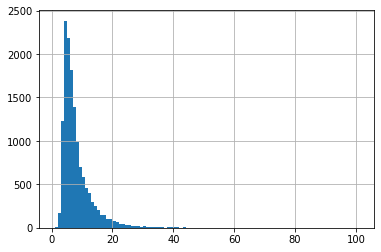

In [38]:
df['unique cardinality'].hist(bins=100)

In [39]:
pop = df[df['genre'].str.contains('Pop')]

In [40]:
jazz = df[df['genre'].str.contains('Jazz')]

In [41]:
pop['unique cardinality'].mode()

0    5
dtype: int64

In [42]:
jazz['unique cardinality'].mode()

0    6
dtype: int64

#### By genre 

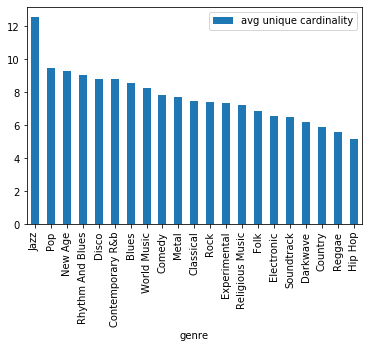

In [43]:
plot_mean_by_genre('unique cardinality')

#### By decade 

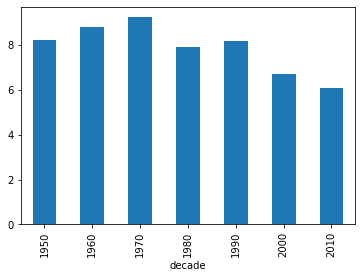

In [44]:
plot_mean_by_decade('unique cardinality')

### Mode

Major :)

Minor :(

Neutral :|

In [45]:
from jl_extended_chord import ChordMode

In [46]:
df['major cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Major))

In [47]:
df['minor cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Minor))

In [48]:
df['neutral cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Neutral))

In [49]:
def show_info(series):
    print(series.describe())
    print(f"Mode:{series.mode()}")
    series.hist(bins=100)

count    14031.000000
mean        60.802437
std         51.953680
min          0.000000
25%         34.000000
50%         53.000000
75%         78.000000
max       1871.000000
Name: major cardinality, dtype: float64
Mode:0    40
dtype: int64


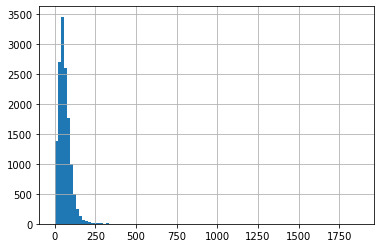

In [50]:
show_info(df['major cardinality'])

count    14031.000000
mean        22.596394
std         27.375530
min          0.000000
25%          6.000000
50%         17.000000
75%         32.000000
max       1022.000000
Name: minor cardinality, dtype: float64
Mode:0    0
dtype: int64


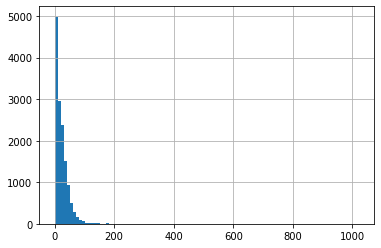

In [51]:
show_info(df['minor cardinality'])

In average, there are three times more major chords than minor chords. It is the expected discovery

count    14031.000000
mean         2.627183
std         12.161789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        318.000000
Name: neutral cardinality, dtype: float64
Mode:0    0
dtype: int64


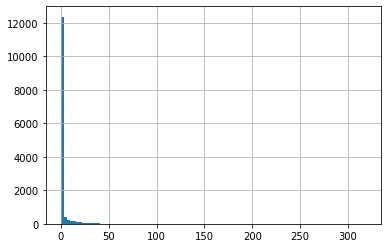

In [52]:
show_info(df['neutral cardinality'])

In [53]:
df[df['neutral cardinality'] == 318]

,url,name,decade,genre,chords,uuid,artist,cardinality,unique cardinality,major cardinality,minor cardinality,neutral cardinality
10816,https://tabs.ultimate-guitar.com/tab/scorpions...,Rock You Like A Hurricane (ver 2),1980,Metal,"[E5, G5, A5, C5, D5, C5, E5, C5, E5, D5, C5, E...",564b6999-b037-4758-9b15-3adc9b88357a,Scorpions,318,5,0,0,318


Scorpions like removing the third... :)

### Sadness  

Let's use previous features to calculate a new feature: `sadness`

In [54]:
df['sadness'] = (df['minor cardinality'] / df['cardinality'])


In [55]:
df['sadness'].describe()

count    14031.000000
mean         0.257273
std          0.201813
min          0.000000
25%          0.096872
50%          0.243590
75%          0.375000
max          1.000000
Name: sadness, dtype: float64

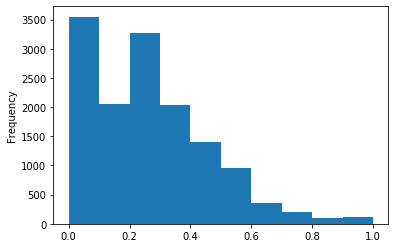

In [56]:
df['sadness'].plot.hist()

In [57]:
df[df['genre'].str.contains('Metal')]['sadness'].mean()

0.2790716907934111

In [58]:
df[df['genre'].str.contains('Jazz')]['sadness'].mean()

0.3178758089746847

In [59]:
df[df['genre'].str.contains('Pop')]['sadness'].mean()

0.2742307112838404

In [60]:
df[df['genre'].str.contains('Rock')]['sadness'].mean()

0.21933666795532078

#### By genre 

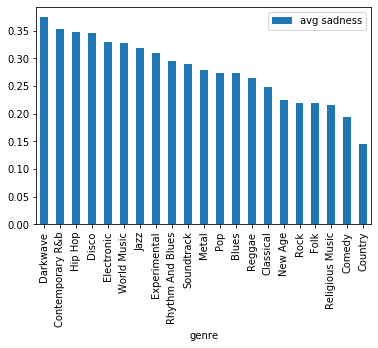

In [61]:
plot_mean_by_genre('sadness')

####  By decade

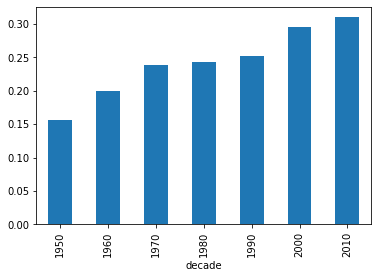

In [62]:
plot_mean_by_decade('sadness')

Los modernos somos unos tristes

### Harmonic mean 

In [63]:
df['harmonic mean X'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_x)

In [64]:
df['harmonic mean Y'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_y)

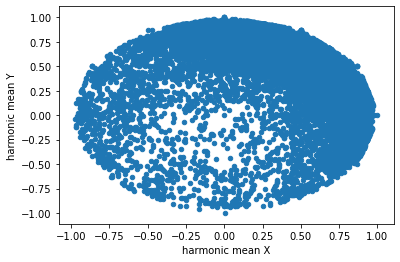

In [65]:
df.plot.scatter(x='harmonic mean X', y='harmonic mean Y')

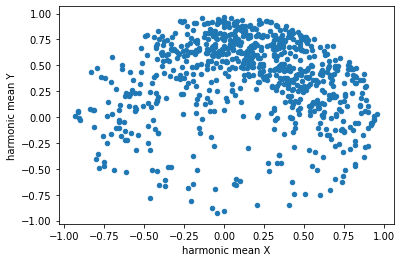

In [66]:
df[df['genre'].str.contains('Jazz')].plot.scatter(x='harmonic mean X', y='harmonic mean Y')

In [67]:
df['harmonic mean position'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_position)

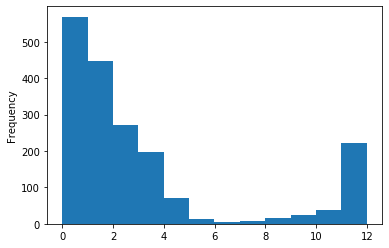

In [68]:
df[df['genre'].str.contains('Rock')]['harmonic mean position'].plot.hist(bins=12)

### Widths 

In [69]:
 df['subdominant width'] = df['chords'].apply(feature_extractor.extract_subdominant_width)

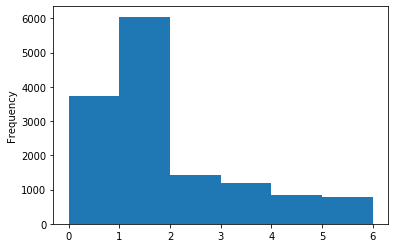

In [70]:
 df['subdominant width'].plot.hist(bins=6)

In [71]:
df['dominant width'] = df['chords'].apply(feature_extractor.extract_dominant_width)

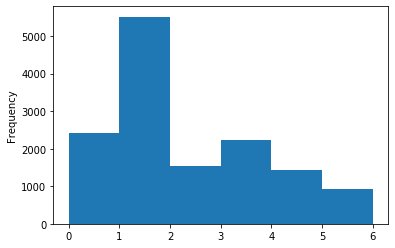

In [72]:
df['dominant width'].plot.hist(bins=6)

In [73]:
df['harmonic width'] =  df['subdominant width'] + df['dominant width']

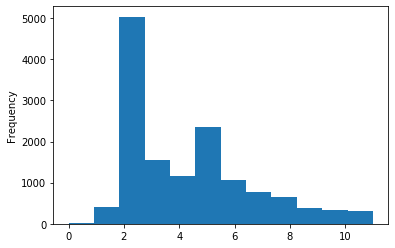

In [74]:
df['harmonic width'].plot.hist(bins=12)

#### By genre 

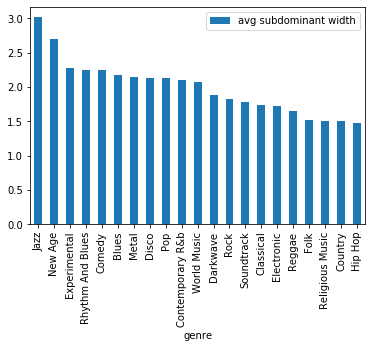

In [75]:
plot_mean_by_genre('subdominant width')

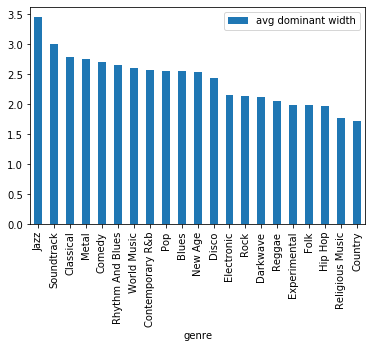

In [76]:
plot_mean_by_genre('dominant width')

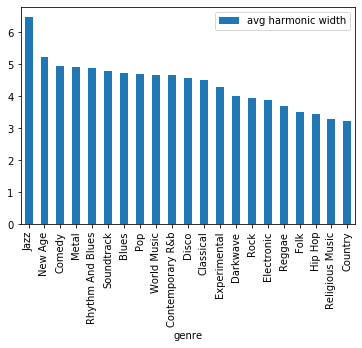

In [77]:
plot_mean_by_genre('harmonic width')

#### By decade 

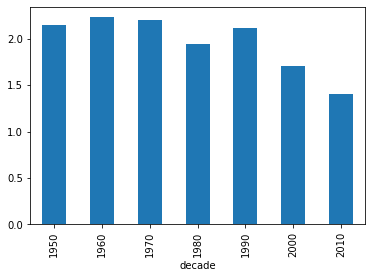

In [78]:
plot_mean_by_decade('subdominant width')

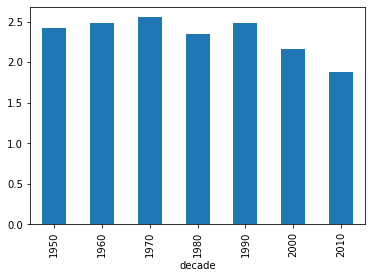

In [79]:
plot_mean_by_decade('dominant width')

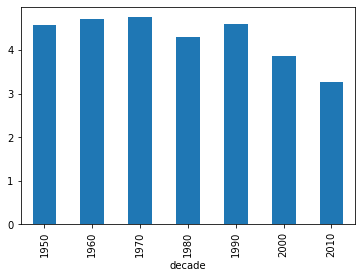

In [80]:
plot_mean_by_decade('harmonic width')

### Complexity 

In [81]:
 df['complexity'] = df['chords'].apply(feature_extractor.extract_complexity)

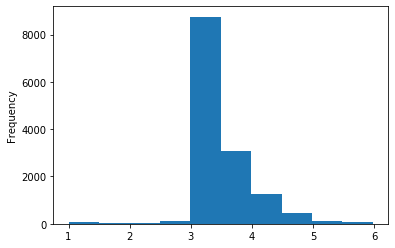

In [82]:
df['complexity'].plot.hist()

#### By genre 

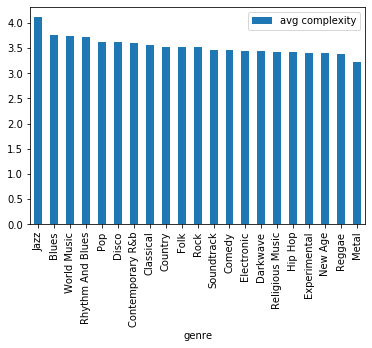

In [83]:
plot_mean_by_genre('complexity')

#### By decade 

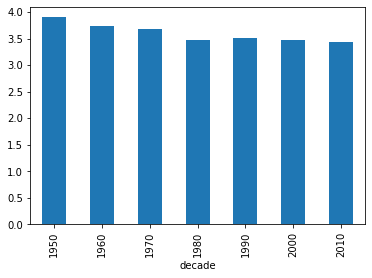

In [84]:
plot_mean_by_decade('complexity')

In [85]:
df[df['genre'].str.contains('Jazz')].groupby('decade')['url'].count()

decade
1950    204
1960    192
1970     70
1980     38
1990     74
2000    145
2010     52
Name: url, dtype: int64

### Slash chord distrbution 

In [86]:
df['slash chords'] = df['chords'].apply(feature_extractor.extract_relative_on_list)

In [90]:
set(df['slash chords'].sum())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

All the notes are included as slash chord...!

In [93]:
list(range(0,12))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [94]:
slash_df = pd.DataFrame(list(range(0,12)), columns=['slash in semitones'])

In [95]:
slash_df

,slash in semitones
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [97]:
slash_df['count'] = slash_df['slash in semitones'].apply( \
    lambda slash: len(df[df['slash chords'].apply( \
            lambda slashes: slash in slashes)] ))

In [98]:
slash_df

,slash in semitones,count
0,0,17
1,1,36
2,2,498
3,3,287
4,4,1713
5,5,376
6,6,39
7,7,1027
8,8,96
9,9,263


In [108]:
from music21.interval import Interval
from music21.note import Note

In [109]:
slash_df['interval'] = slash_df['slash in semitones'].apply(lambda st: Interval(noteStart=Note(0),noteEnd=Note(st)).name)

In [110]:
slash_df

,slash in semitones,count,interval
0,0,17,P1
1,1,36,A1
2,2,498,M2
3,3,287,m3
4,4,1713,M3
5,5,376,P4
6,6,39,A4
7,7,1027,P5
8,8,96,A5
9,9,263,M6


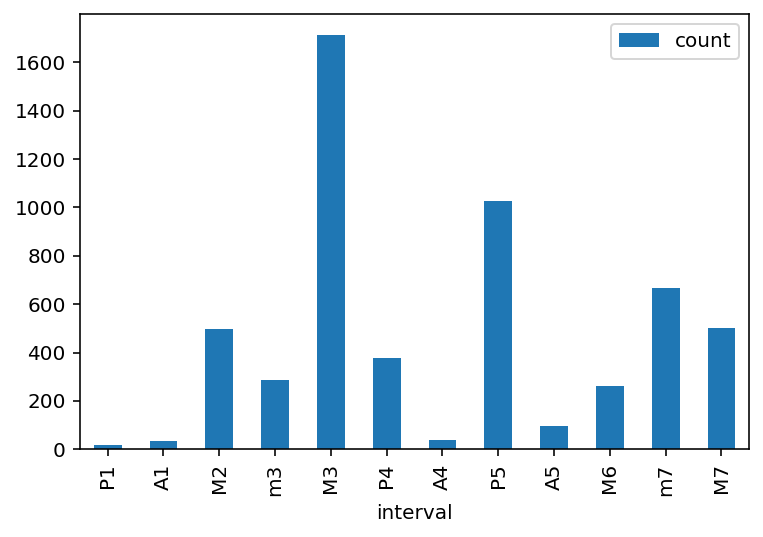

In [114]:
slash_df.plot.bar(x='interval', y='count')

Let's discard slash chords to simplify the problem

In [118]:
songs_without_slash_chords = len(df[df['slash chords'].apply(lambda slashes: len(slashes) == 0)])
songs_without_slash_chords

11012

In [119]:
songs_with_slash_chords = len(df[df['slash chords'].apply(lambda slashes: len(slashes) > 0)])
songs_with_slash_chords

3019